# Анализ системы метрик приложения

Вы — продуктовый аналитик приложения Procrastinate Pro+, которое предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный. С его помощью менеджеры стремятся расширить аудиторию, добавив в неё пользователей, которые увлекаются спортом и здоровым образом жизни.

К запуску нового контента была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать. Нужно разобраться, почему это происходит.

Ваши задачи:
- провести анализ юнит-экономики продукта в динамике за первые 28 дней;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.


### Данные

В вашем распоряжении есть данные о посещениях приложения, покупках и расходах на маркетинг.
Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.
    
### План проекта
- Загрузить и предобработать данные.
- Подготовить данные для когортного анализа.
- Рассчитать и проанализировать метрики вовлечённости в продукт.
- Рассчитать и проанализировать финансовые метрики CAC, LTV и ROI за первые 28 дней с момента привлечения.
- Исследовать метрики в разрезе источника привлечения.
- Рассчитать период окупаемости маркетинговых вложений.
- Сформулировать выводы и рекомендации.


## Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем датасеты в датафреймы
visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

In [3]:
# Информация о датафрейме visits
print("Информация о visits:")
visits.info()
print("\nПервые 5 строк:")
display(visits.head())
print("\nПроверка на пропущенные значения в visits:")
print(visits.isnull().sum())
print('\nКоличество дубликатов:')
print(visits.duplicated().sum())

Информация о visits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        161865 non-null  int64 
 1   region         161865 non-null  object
 2   device         161865 non-null  object
 3   channel        161865 non-null  object
 4   session_start  161865 non-null  object
 5   session_end    161865 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.4+ MB

Первые 5 строк:


,user_id,region,device,channel,session_start,session_end
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00



Проверка на пропущенные значения в visits:
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Количество дубликатов:
0


In [4]:
# Информация о датафрейме orders
print("\nИнформация о orders:")
orders.info()
print("\nПервые 5 строк orders:")
display(orders.head())
print("\nПроверка на пропущенные значения в orders:")
print(orders.isnull().sum())
print('\nКоличество дубликатов:')
print(orders.duplicated().sum())


Информация о orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   33893 non-null  int64  
 1   event_dt  33893 non-null  object 
 2   revenue   33893 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 794.5+ KB

Первые 5 строк orders:


,user_id,event_dt,revenue
0,771951256319,2024-04-01 05:56:26,2.99
1,829942381059,2024-04-01 14:55:02,2.99
2,727879856738,2024-04-01 22:15:09,14.99
3,481270888930,2024-04-01 06:05:14,2.99
4,844695029762,2024-04-01 01:19:52,2.99



Проверка на пропущенные значения в orders:
user_id     0
event_dt    0
revenue     0
dtype: int64

Количество дубликатов:
0


In [5]:
# Информация о датафрейме costs
print("\nИнформация о costs:")
costs.info()
print("\nПервые 5 строк costs:")
display(costs.head())
print("\nПроверка на пропущенные значения в costs:")
print(costs.isnull().sum())
print('\nКоличество дубликатов:')
print(costs.duplicated().sum())


Информация о costs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       976 non-null    object 
 1   channel  976 non-null    object 
 2   costs    976 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.0+ KB

Первые 5 строк costs:


,dt,channel,costs
0,2024-04-01,FaceBoom,124.938874
1,2024-04-02,FaceBoom,88.147779
2,2024-04-03,FaceBoom,120.779457
3,2024-04-04,FaceBoom,98.981253
4,2024-04-05,FaceBoom,109.044760



Проверка на пропущенные значения в costs:
dt         0
channel    0
costs      0
dtype: int64

Количество дубликатов:
0


In [6]:
# Преобразуем столбцы с датами в временной формат
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.to_period('D')
costs['dt'] = pd.to_datetime(costs['dt']).dt.to_period('D')

## **Подготовка данных к когортному анализу**

Подготовьте данные к когортному анализу с учётом того, что вы будете изучать окупаемость привлечения пользователей за первые 28 дней.

Для каждого пользователя найдите:
- дату первой сессии (дата привлечения пользователя, `first_dt`);
- канал привлечения (`first_channel`);
- стоимость привлечения пользователя (`cac`).

Результаты сохраните в новой таблице, например, `profiles`.

Добавьте к данным с событиями и покупками информацию о первом источнике привлечения и дату привлечения пользователя из созданной таблицы. После этого рассчитайте дневной лайфтайм для каждого события или покупки и добавьте в таблицу в виде целого числа. В дальнейшем при проведении когортного анализа используйте информацию о первом источнике привлечения пользователя.

In [7]:
# Создаем копию оригинального датафрейма, чтобы не изменить
# оригинальные данные
visits_full = visits.copy()

In [8]:
# Находим дату привлечения пользователя
visits_full['first_dt'] = visits_full.groupby('user_id')['session_start'].transform('min')
visits_full['first_dt'] = pd.to_datetime(visits_full['first_dt']).dt.to_period('D')

In [9]:
# Находим первый просмотренный канал на каждого пользователя
visits_full['first_channel'] = visits_full.groupby('user_id')['channel'].transform('first')

In [10]:
# Делаем промежуточные датафреймы для последующего расчета CAC
cost_per_day = costs.groupby(['dt', 'channel'])['costs'].sum().reset_index()
cost_per_day.rename(columns={'dt': 'first_dt'}, inplace=True)

users_per_day = visits_full.groupby(['first_dt', 'channel'])['user_id'].nunique().reset_index()

In [11]:
# Объединяем их в общий датафрейм
df_cac = pd.merge(
    cost_per_day,
    users_per_day,
    on=['first_dt', 'channel'],
    how='inner')

# Меняем наименования столбцов на более интуитивно понятные названия
df_cac.rename(
    columns={
        'costs': 'total_costs',
        'user_id': 'new_users',
        'channel':'first_channel'
    },
    inplace=True)

# Считаем САС
df_cac['CAC'] = df_cac['total_costs'] / df_cac['new_users']

# Выводим первые строчки датафрейма
df_cac.head()

,first_dt,first_channel,total_costs,new_users,CAC
0,2024-04-01,FaceBoom,124.938874,135,0.925473
1,2024-04-01,MediaTornado,19.932806,82,0.243083
2,2024-04-01,RocketSuperAds,62.050000,71,0.873944
3,2024-04-01,TipTop,54.200101,76,0.713159
4,2024-04-02,FaceBoom,88.147779,100,0.881478


In [12]:
# Сортируем данные
visits = visits.sort_values(by='session_start')

# Делаем датафрейм с данными по каждому привлеченному пользователю и его САС
# по дате и каналу привлечения
profiles = visits_full.groupby('user_id').agg({
    'first_dt': 'min',
    'first_channel':'first'
    }).reset_index()

# Объединяем данные
profiles = pd.merge(
    profiles,
    df_cac[['first_dt', 'first_channel', 'CAC']],
    on=['first_dt', 'first_channel'],
    how='left')

print(profiles.info())
print(profiles.duplicated().sum())
profiles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74856 entries, 0 to 74855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   user_id        74856 non-null  int64    
 1   first_dt       74856 non-null  period[D]
 2   first_channel  74856 non-null  object   
 3   CAC            74856 non-null  float64  
dtypes: float64(1), int64(1), object(1), period[D](1)
memory usage: 2.3+ MB
None
0


,user_id,first_dt,first_channel,CAC
0,26034876,2024-05-29,FaceBoom,0.932527
1,69890364,2024-06-28,RocketSuperAds,0.585403
2,75610104,2024-06-09,FaceBoom,1.172933
3,76692397,2024-10-21,FaceBoom,1.120194
4,80224421,2024-06-21,FaceBoom,1.189637


In [13]:
# Добавляем данные о первом источнике привлечения и дате привлечения
# в новый полный датафрейм с данными о заказах
orders_full = orders.merge(
    profiles,
    on='user_id',
    how='left')

In [14]:
visits_full['session_start_days'] = pd.to_datetime(visits_full['session_start']).dt.to_period('D')

In [15]:
# Рассчитываем N-day для visits и orders
visits_full['lifetime'] = (
    visits_full['session_start_days'].dt.to_timestamp() -
    visits_full['first_dt'].dt.to_timestamp()
).dt.days.astype(int)

orders_full['lifetime'] = (
    orders_full['event_dt'].dt.to_timestamp() -
    orders_full['first_dt'].dt.to_timestamp()
).dt.days.astype(int)

После обработки данных мы имеем в работе 3 оригинальных датафрейма, дополненных необходимыми колонками, а также 2 новых:

`profiles` - подробные данные о привлечении каждого пользователя по отдельности

`df_cac` - сгруппированные данные о маркетинговых затратах по месяцам

### Датафрейм `visits_full`

In [16]:
visits_full.head()

,user_id,region,device,channel,session_start,session_end,first_dt,first_channel,session_start_days,lifetime
0,631105188566,India,desktop,MediaTornado,2024-04-01 03:48:00,2024-04-01 04:19:00,2024-04-01,MediaTornado,2024-04-01,0
1,892885906464,India,tv,RocketSuperAds,2024-04-01 00:47:00,2024-04-01 01:14:00,2024-04-01,RocketSuperAds,2024-04-01,0
2,517003690029,India,mobile,MediaTornado,2024-04-01 17:31:00,2024-04-01 17:53:00,2024-04-01,MediaTornado,2024-04-01,0
3,185156659289,India,mobile,MediaTornado,2024-04-01 14:36:00,2024-04-01 14:51:00,2024-04-01,MediaTornado,2024-04-01,0
4,409503040345,India,mobile,RocketSuperAds,2024-04-01 08:25:00,2024-04-01 08:45:00,2024-04-01,RocketSuperAds,2024-04-01,0


### Датафрейм `orders_full`

In [17]:
orders_full.head()

,user_id,event_dt,revenue,first_dt,first_channel,CAC,lifetime
0,771951256319,2024-04-01,2.99,2024-04-01,FaceBoom,0.925473,0
1,829942381059,2024-04-01,2.99,2024-04-01,FaceBoom,0.925473,0
2,727879856738,2024-04-01,14.99,2024-04-01,FaceBoom,0.925473,0
3,481270888930,2024-04-01,2.99,2024-04-01,TipTop,0.713159,0
4,844695029762,2024-04-01,2.99,2024-04-01,FaceBoom,0.925473,0


### Датафрейм `profiles`

In [18]:
profiles.head()

,user_id,first_dt,first_channel,CAC
0,26034876,2024-05-29,FaceBoom,0.932527
1,69890364,2024-06-28,RocketSuperAds,0.585403
2,75610104,2024-06-09,FaceBoom,1.172933
3,76692397,2024-10-21,FaceBoom,1.120194
4,80224421,2024-06-21,FaceBoom,1.189637


### Датафрейм `df_cac`

In [19]:
df_cac.head()

,first_dt,first_channel,total_costs,new_users,CAC
0,2024-04-01,FaceBoom,124.938874,135,0.925473
1,2024-04-01,MediaTornado,19.932806,82,0.243083
2,2024-04-01,RocketSuperAds,62.050000,71,0.873944
3,2024-04-01,TipTop,54.200101,76,0.713159
4,2024-04-02,FaceBoom,88.147779,100,0.881478


Промежуточный вывод по предобработке:
- visits_full
    - Обработаны пропуски, дубликаты, временные метки
    - Выделены источники трафика и дни привлечения
    - Отобраны дни с момента первого визита
- orders_full
    - Обработаны пропуски, дубликаты, временные метки
    - Выделены источники трафика и дни привлечения
    - Отобраны дни с момента первого визита
    - Создана метрика CAC
- profiles
    - Стандартизированы категориальные признаки
    - Данные сгруппированы по пользователям
    - Проведена привязка САС к пользователям
- df_cac
    - Данные сгруппированы по датам и источникам трафика
    - Вычислен CAC
    - Вычислено общее число привлечённых пользователей
Качество данных:
    - Данные проверены на пропуски и дубликаты
    - Проверена целостность данных
    - Синхронизированы временные периоды
Данные готовы для анализа и построения визуализаций.

## Анализ месячной динамики основных метрик продукта

Начните анализ данных с изучения динамики активности пользователей и их вовлечённости в продукт. Рассчитайте по всем данным значения DAU, MAU и Stickiness и визуализируйте их. Активными считайте всех пользователей, которые взаимодействовали с приложением.

В разрезе каждого месяца привлечения новых пользователей рассчитайте:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

Здесь и далее при расчёте LTV и ROI учитывайте всех привлечённых пользователей когорты.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.


### DAU

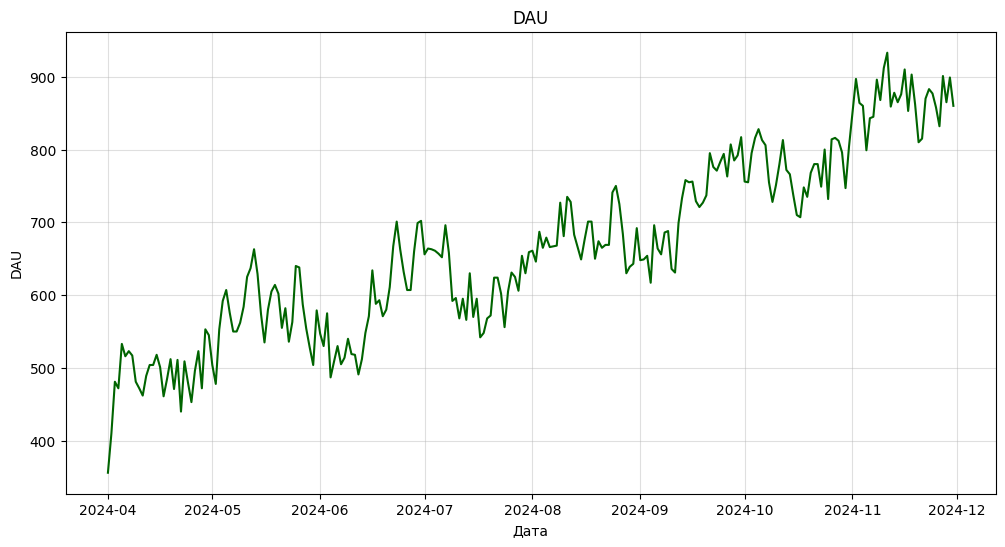

In [20]:
# Формируем датафрейм для DAU
dau = visits_full.groupby('session_start_days')['user_id'].nunique().reset_index()

# Меняем названия столбцов
dau.rename(columns={'session_start_days': 'date', 'user_id': 'DAU'}, inplace=True)

# Приводим дату к типу времени для визуализации
dau['date'] = dau['date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=dau, x='date', y='DAU', color='darkgreen')
plt.title('DAU')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.grid(alpha=.4)
plt.show()

### MAU

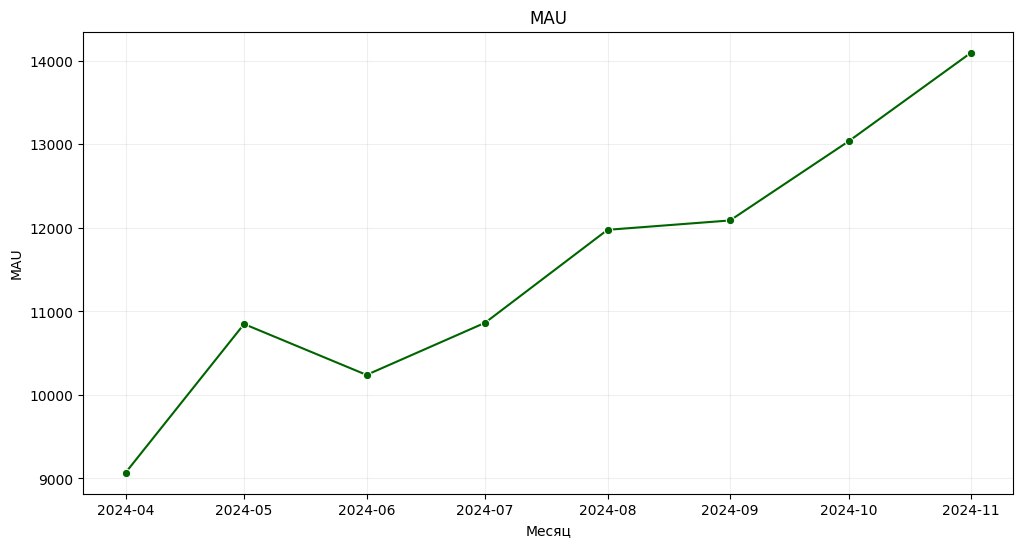

In [21]:
# Формируем датафрейм для MAU
mau = (
    visits_full
    .groupby(
        visits_full['session_start_days']
        .dt.to_timestamp()
        .dt.to_period('M')
    )['user_id']
    .nunique()
    .reset_index())

# Меняем названия столбцов
mau.rename(columns={'session_start_days': 'month', 'user_id': 'MAU'}, inplace=True)

# Приводим дату к типу времени для визуализации
mau['month'] = mau['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mau, x='month', y='MAU', marker='o', color='darkgreen')
plt.title('MAU')
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.grid(alpha=.2)
plt.show()

### Stickiness


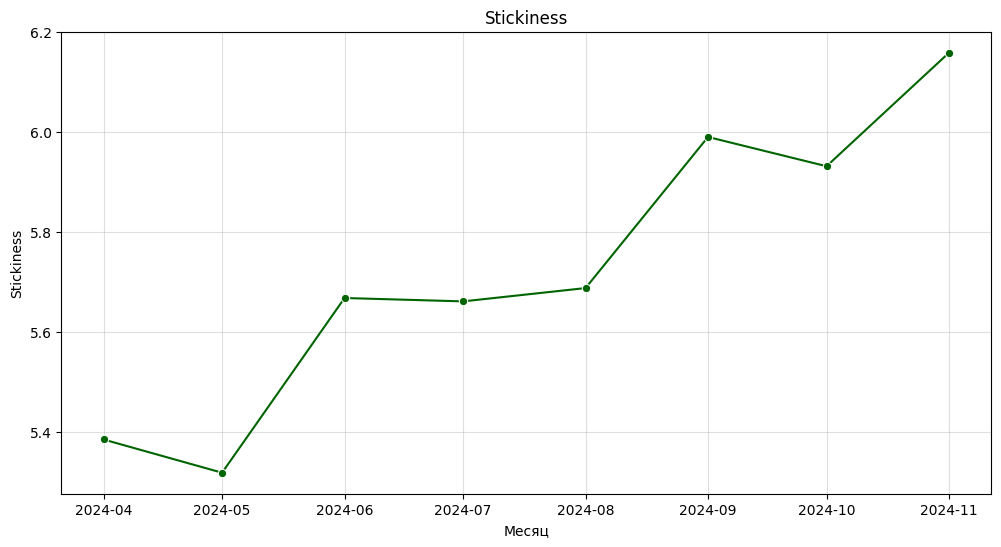

In [22]:
# Добавляем столбец 'month' в датафрейм dau, преобразуя дату к периоду "месяц"
#  и обратно к дате (первый день месяца)
dau['month'] = dau['date'].dt.to_period('M').dt.to_timestamp()

# Группируем по месяцам и считаем среднее значение DAU для каждого месяца
dau_monthly = dau.groupby('month')['DAU'].mean().reset_index()

# Объединяем месячный DAU с MAU по столбцу 'month'
stickiness_df = pd.merge(dau_monthly, mau, on='month')

# Считаем stickiness
stickiness_df['stickiness'] = stickiness_df['DAU'] / stickiness_df['MAU'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=stickiness_df, x='month', y='stickiness', marker='o', color='darkgreen')
plt.title('Stickiness')
plt.xlabel('Месяц')
plt.ylabel('Stickiness')
plt.grid(alpha=.4)
plt.show()

Судя по графикам MAU, DAU и Stickiness, с начала лета (июнь) наблюдается увеличение общей активности пользователей. Несмотря на то, что MAU временно уменьшилось в июне, Stickiness при этом только увеличивается, что может указывать на то, что старые и новые пользователи более активно возвращаются в приложение по сравнению с предыдущим периодом.



### CAC по когортам

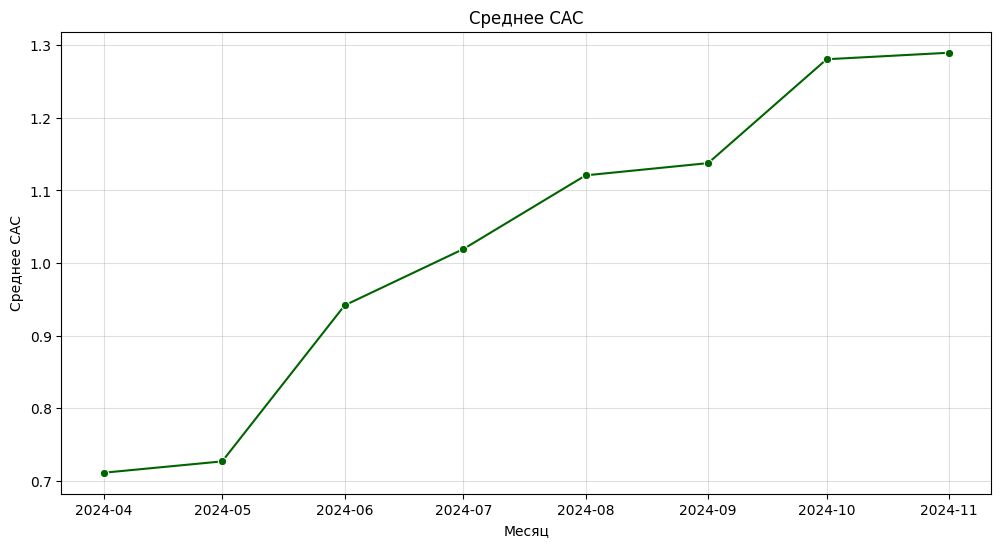

In [23]:
# Группируем данные по месяцу первого действия пользователя и считаем средний CAC по каждому месяцу
mean_cac = (
    profiles
    .groupby(
        profiles['first_dt']
        .dt.to_timestamp()
        .dt.to_period('M')
    )['CAC']
    .mean()
    .reset_index())

# Меняем названия столбцов
mean_cac.rename(columns={'first_dt': 'month'}, inplace=True)

# Приводим дату к типу времени для визуализации
mean_cac['month'] = mean_cac['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_cac, x='month', y='CAC', marker='o', color='darkgreen')
plt.title('Среднее CAC')
plt.xlabel('Месяц')
plt.ylabel('Среднее CAC')
plt.grid(alpha=.4)
plt.show()

### Значение LTV с учётом покупок, совершённых за 28 дней с момента привлечения

In [24]:
# Фильтрация заказов: оставляем только заказы, сделанные в первые 28 дней
# И убираем заказы, где лайфтим по умолчанию меньше 28 дней
# (то есть самый последний клиент будет в конце октября)
filtered_orders = orders_full[
    (orders_full['lifetime'] <= 28) &
    (orders_full['first_dt'] < '2024-11-01')]

# Сортировка данных по ID пользователя и дню заказа
# Необходима для корректного расчета накопительных значений (LTV)
filtered_orders = filtered_orders.sort_values(by=['user_id', 'lifetime'])

# Расчет LTV (Lifetime Value) - накопительной ценности клиента
filtered_orders['LTV'] = filtered_orders.groupby('user_id')['revenue'].transform('cumsum')


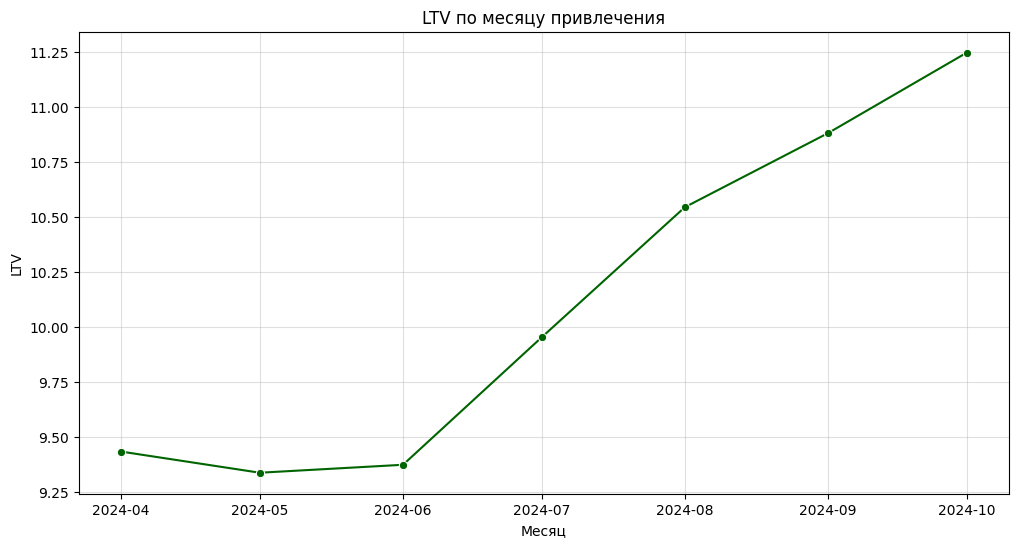

In [25]:
# Расчет среднего LTV по месяцам с момента первого использования
mean_ltv = (filtered_orders
          .groupby(
              (filtered_orders['first_dt']
              .dt.to_timestamp()
              .dt.to_period('M'))
          )['LTV']
          .mean()
          .reset_index())

# Переименование столбцов для удобства использования
mean_ltv.rename(columns={'first_dt': 'month'}, inplace=True)

# Преобразуем столбец с месяцем привлечения в вид даты и времени
mean_ltv['month'] = mean_ltv['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_ltv, x='month', y='LTV',
           marker='o', color='darkgreen')
plt.title('LTV по месяцу привлечения')
plt.xlabel('Месяц')
plt.ylabel('LTV')
plt.grid(alpha=0.4)
plt.show()

### Значение ROI с учётом покупок, совершённых за 28 дней с момента привлечения

In [26]:
# Приводим столбец к периоду времени
mean_cac['month'] = mean_cac['month'].dt.to_period('M').dt.to_timestamp()

# Объединяем данные по CAC и LTV через inner соединение
mean_roi = pd.merge(
    mean_ltv,
    mean_cac,
    on='month')

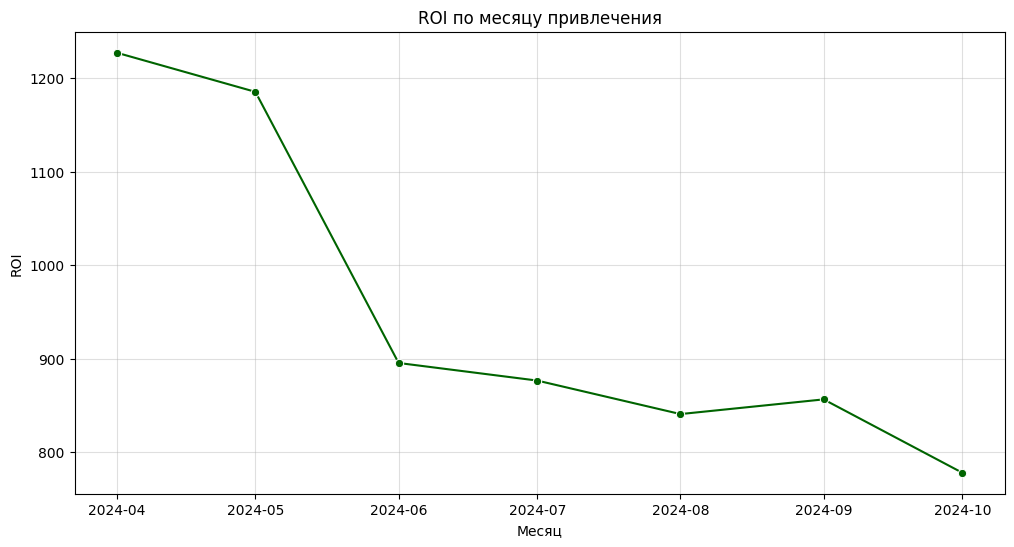

In [27]:
# Расчет ROI
mean_roi['ROI'] = (mean_roi['LTV'] - mean_roi['CAC']) / mean_roi['CAC'] * 100

mean_roi.rename(columns={'first_dt': 'month'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_roi, x='month', y='ROI',
           marker='o', color='darkgreen')
plt.title('ROI по месяцу привлечения')
plt.xlabel('Месяц')
plt.ylabel('ROI')
plt.grid(alpha=0.4)
plt.show()

На основе анализа метрик DAU, MAU, Stickiness, LTV и ROI можно сделать следующий промежуточный вывод:
- Активность пользователей: С начала лета (июнь 2024 года), когда в приложении появился новый спортивный контент, наблюдается увеличение общей активности пользователей.
- MAU и Stickiness: Несмотря на временное снижение MAU в июне, Stickiness (показатель вовлеченности и удержания пользователей) продолжает расти. Это может указывать на то, что пользователи, как старые, так и новые, стали чаще возвращаться в приложение и проводить в нем время по сравнению с периодом до запуска нового контента.
- LTV: Графики LTV по когортам привлечения показывают, что накопительный LTV в когортах, привлеченных после появления нового контента, имеет тенденцию к увеличению со временем в течение первых 28 дней. Это означает, что пользователи, привлеченные в более поздние периоды, приносят быстрее и больше выручки за тот же срок по сравнению с ранними когортами.
- ROI: Динамика ROI отражает тенденцию к ухудшению показателей. В более поздних когортах ROI либо остается на низком уровне, либо снижается.
- Таким образом, несмотря на увеличение общей активности пользователей и Stickiness с LTV после запуска нового контента, наблюдается негативная динамика в финансовой метрике ROI в новых когортах.
- Потенциальная причина может быть в резком увеличении CAC в относительном, а не абсолютном выражении, что сильно бьет по коэффициенту расчета ROI

## Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

Определите самые популярные источники привлечения:
- Посчитайте общее число привлечённых пользователей для каждого источника.
- Визуализируйте динамику набора новых пользователей по дням в каждом источнике.
- Рассчитайте и визуализируйте динамику DAU, MAU и Stickiness по источникам привлечения.

Изучите динамику изменения метрик на 28-й день в разрезе источника. Проведите анализ с выделением недельных когорт по дате привлечения. Рассчитайте и визуализируйте:
- Скользящее удержание на 14-й день с момента привлечения (за период с 14-го по 28-й день).
- Конверсию в покупку.
- Недельную динамику затрат на маркетинг по каждому источнику привлечения.
- Динамику среднего CAC, значений LTV и ROI.

По результатам проведите анализ рекламных каналов. Дайте общую характеристику каждому рекламному каналу по рассчитанным метрикам. Укажите, какие рекламные каналы не вышли на уровень окупаемости за ожидаемый период, и предположите почему.


### Общее число привлечённых пользователей для каждого источника

In [28]:
# Подсчет общего числа привлеченных пользователей для каждого источника
total_per_channel = profiles['first_channel'].value_counts().reset_index()
total_per_channel.rename(columns={'first_channel': 'channel', 'count': 'total'}, inplace = True)
total_per_channel

,channel,total
0,FaceBoom,28401
1,TipTop,18118
2,RocketSuperAds,14257
3,MediaTornado,14080


### Динамика набора новых пользователей по дням в каждом источнике

/tmp/ipykernel_75815/2433548394.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(


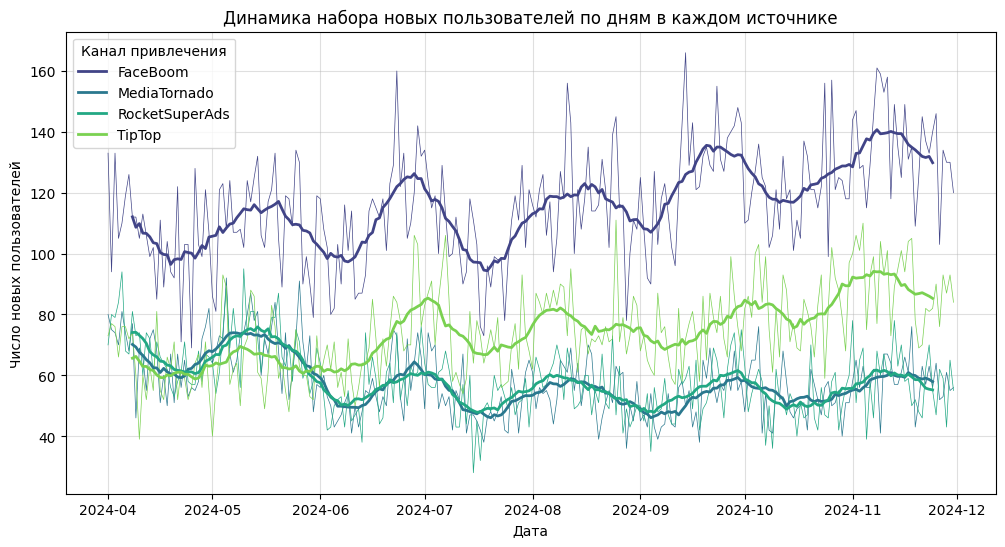

In [29]:
# Подсчитываем количество уникальных новых пользователей по дням и каналам привлечения
new_users_day_channel = (
    profiles
    .groupby(
        [profiles['first_dt'],
         'first_channel'])
    ['user_id']
    .nunique()
    .reset_index())

# Преобразуем даты из Period в Timestamp 
new_users_day_channel['first_dt'] = new_users_day_channel['first_dt'].dt.to_timestamp()

# Создаем сглаженную версию данных с помощью скользящего среднего за 14 дней
# Группируем по каналам и применяем rolling mean для убирания шума в данных
new_users_smoothed = (
    new_users_day_channel
    .groupby('first_channel')
    .apply(lambda x: x.assign(
        user_id_smooth_14d = x['user_id'].rolling(window=14, center=True)
        .mean()))
    .reset_index(drop=True))


plt.figure(figsize=(12, 6))
# Рисуем исходные "шумные" данные 
sns.lineplot(
    data=new_users_day_channel,
    x='first_dt',
    y='user_id',
    hue='first_channel',
    palette='viridis',
    linewidth=0.5,
    legend=False)

# Рисуем сглаженные данные 
sns.lineplot(
    data=new_users_smoothed,
    x='first_dt',
    y='user_id_smooth_14d',
    hue='first_channel',
    palette='viridis',
    linewidth=2)

plt.title('Динамика набора новых пользователей по дням в каждом источнике')
plt.xlabel('Дата')
plt.ylabel('Число новых пользователей')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.show()


Динамика по каналам

- FaceBoom — основной драйвер объёма, уверенный рост с мая по ноябрь, 7-дн. скользящая выше 120–140 у. п./день.

- TipTop — после запуска спортивного контента (июнь–июль) постепенно увеличил количество привлечённых пользователей до 80–90 у. п./день.

- MediaTornado и RocketSuperAds — либо стагнируют, либо даже чуть снижаются (45–60 у. п./день).



### DAU по источнику привлечения

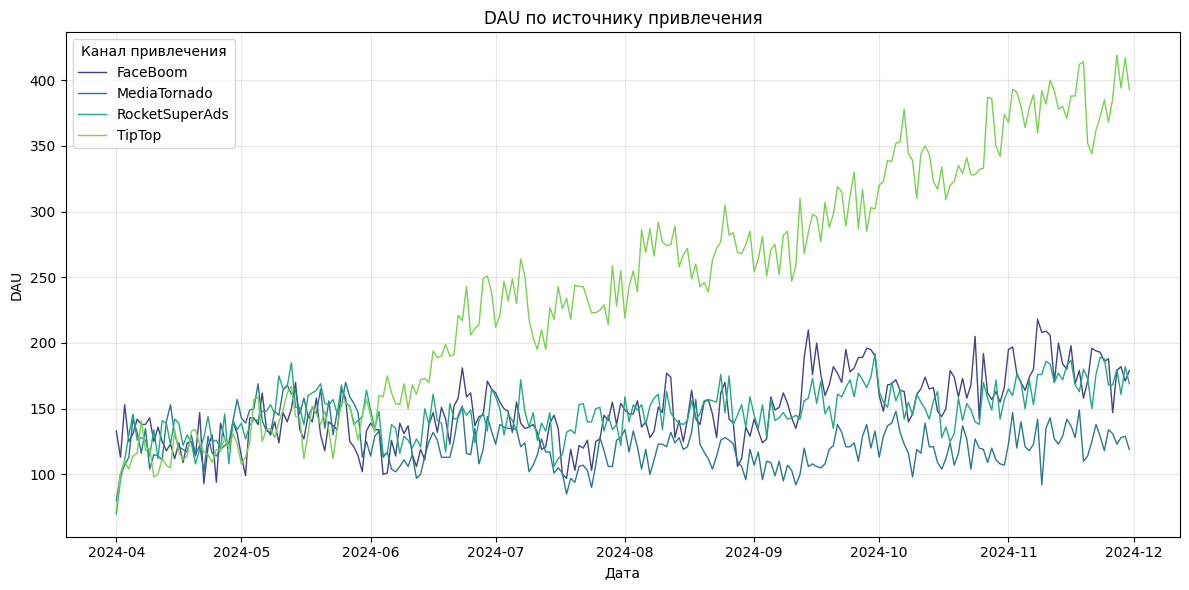

In [30]:
# Формируем датафрейм для DAU
dau_channel = (
    visits_full
    .groupby(['session_start_days', 'channel'])['user_id']
    .nunique()
    .reset_index())

# Меняем названия столбцов
dau_channel.rename(columns={'session_start_days': 'date', 'user_id': 'DAU'}, inplace=True)

# Приводим дату к типу времени для визуализации
dau_channel['date'] = dau_channel['date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=dau_channel, x='date', y='DAU', hue='channel', linewidth=1, palette='viridis')
plt.title('DAU по источнику привлечения')
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()


Динамика по каналам привлечения

- TipTop
    - Запуск спортивного контента совпал с резким ростом DAU: с ~100 в мае до 420+ к ноябрю.
    - Степень роста почти линейная, стал ключевым источником трафика.

- FaceBoom
    - Умеренный рост: с 120–140 в апреле до 180–200 к осени.
    - Периодические всплески после маркетинговых рассылок, но в целом «плато».

- RocketSuperAds
    - Небольшой рост с 140 до 150–160 DAU, затем флуктуации в пределах ±10.

- MediaTornado
    - Стабильные 120–140 DAU до июня, после – постепенный спад к 110–120 и слабая реакция на новый контент.


### MAU по источнику привлечения

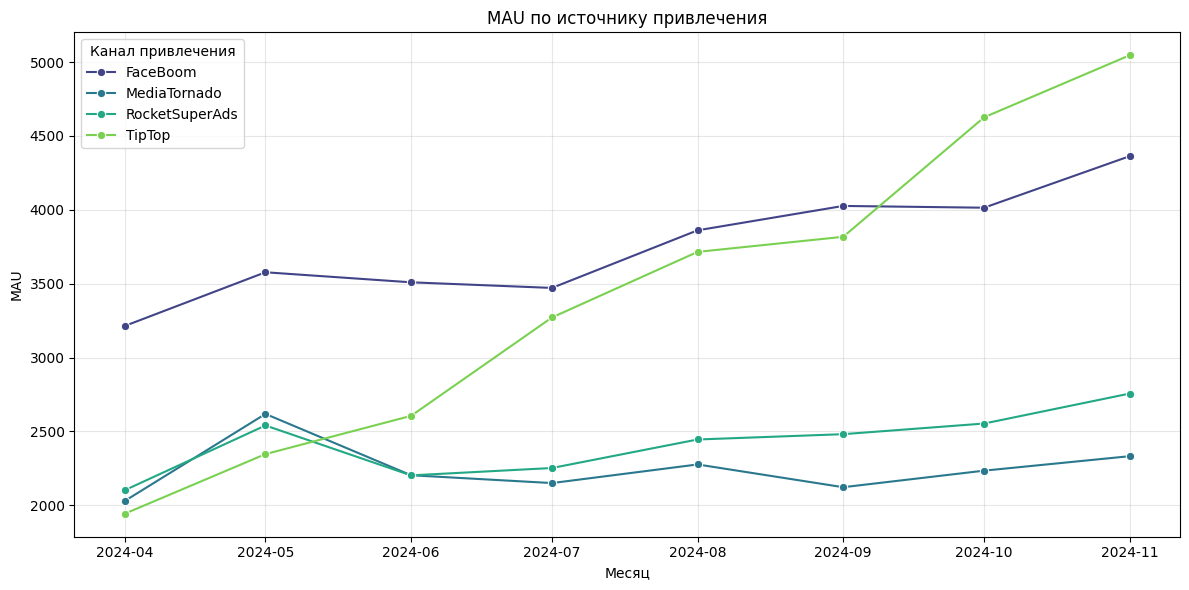

In [31]:
# Формируем датафрейм для MAU
mau_channel = (
    visits_full
    .groupby([
        visits_full['session_start_days']
        .dt.to_timestamp()
        .dt.to_period('M'),
        'channel']
    )['user_id']
    .nunique()
    .reset_index())

# Меняем названия столбцов
mau_channel.rename(
    columns={'session_start_days': 'month', 'user_id': 'MAU'},
    inplace=True)

# Приводим дату к типу времени для визуализации
mau_channel['month'] = mau_channel['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mau_channel,
    x='month',
    marker='o',
    y='MAU',
    hue='channel',
    palette='viridis')

plt.title('MAU по источнику привлечения')
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()

- Основные наблюдения:
    - общий прирост DAU/MAU в приложении обеспечил TipTop, остальные каналы либо стагнируют, либо дают слабый рост
    - при высоком MAU у FaceBoom его DAU в нижней части общих показателей

### Stickiness по источнику привлечения

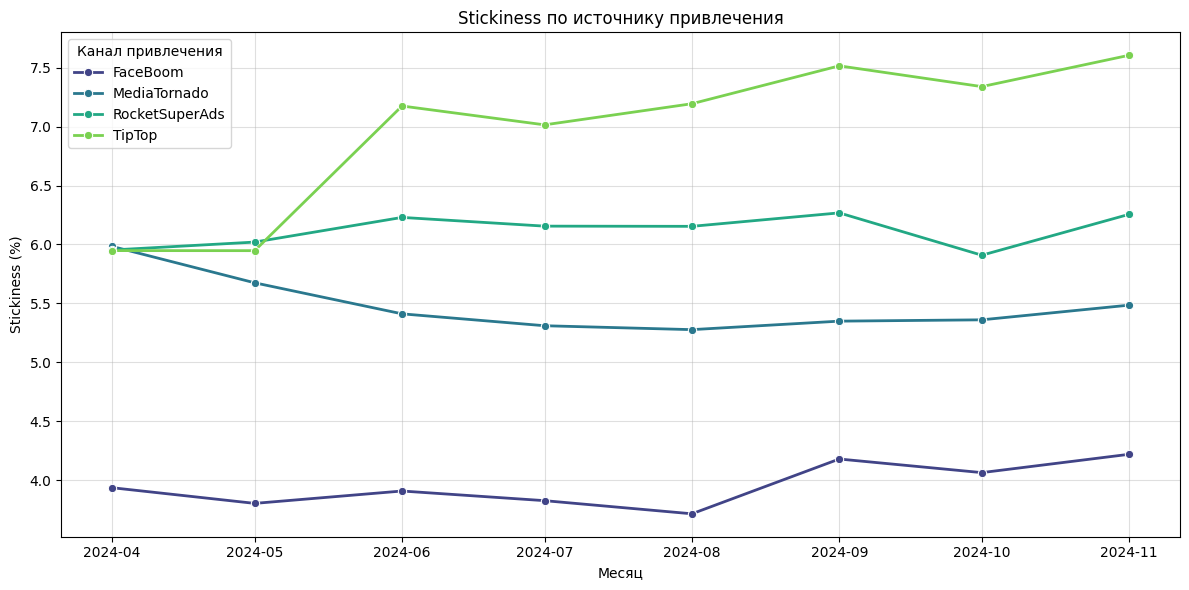

In [32]:
# Добавляем столбец 'month' в датафрейм dau_channel, преобразуя дату к периоду "месяц"
# и обратно к дате (первый день месяца)
dau_channel['month'] = dau_channel['date'].dt.to_period('M').dt.to_timestamp()

# Группируем по месяцам и каналам и считаем среднее значение DAU для каждого месяца и канала
dau_monthly_channel = dau_channel.groupby(['month', 'channel'])['DAU'].mean().reset_index()

# Объединяем месячный DAU с MAU по столбцам 'month' и 'channel'
stickiness_channel_df = pd.merge(
    dau_monthly_channel,
    mau_channel,
    on=['month', 'channel'])

# Считаем stickiness по каналам
stickiness_channel_df['stickiness'] = stickiness_channel_df['DAU'] / stickiness_channel_df['MAU'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=stickiness_channel_df,
    x='month',
    y='stickiness',
    hue='channel',
    marker='o',
    palette='viridis',
    linewidth=2)

plt.title('Stickiness по источнику привлечения')
plt.xlabel('Месяц')
plt.ylabel('Stickiness (%)')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.tight_layout()
plt.show()

Динамика по каналам

- TipTop
    - Рост с ~6,0 % в мае до 7,8 % в ноябре
    - После запуска спортивного контента (июнь) резкий скачок: +1,2 п. п. к июню и стабильный тренд вверх
    - Высокая удерживающая способность: скореее всего спортивные форматы стимулируют пользователей возвращаться каждый день

- RocketSuperAds
    - Стабильный рост с 6,0 % (апрель) до 6,3 % (ноябрь)
    - Умеренное повышение вовлечённости, но менее выраженное, чем у TipTop

- MediaTornado
    - Падение с 5,9 % в апреле до 5,2 % в августе, затем лёгкий откат к 5,5 % к ноябрю
    - Возможно, спортивный контент не удерживает аудиторию, если остальные факторы не оказывают более существенного влияния 

- FaceBoom
    - Низкая базовая удерживающая способность: 3,9 % → 4,2 % (апр–нояб)
    - В целом канал остаётся низковыгодным


### Удержание в период с 14-го по 28-й день

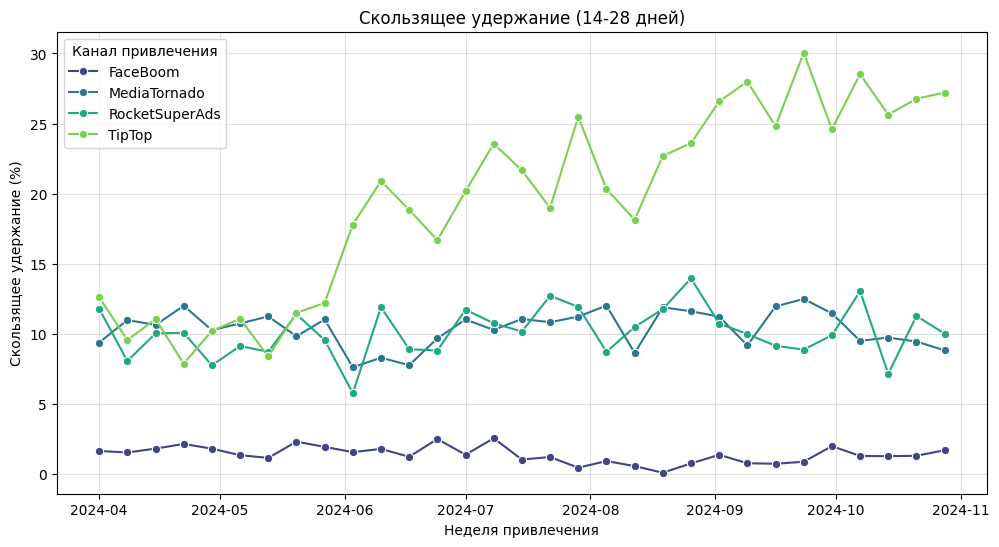

In [33]:
# Создаем когорты по неделе привлечения
visits_full['first_week'] = visits_full['first_dt'].dt.to_timestamp().dt.to_period('W')

# Фильтруем посещения за период с 14 по 28 день включительно и пользователями 
# кто точно имел возможность заходить больше 28 дней с момента привлечения
visits_14_28 = visits_full[
    (visits_full['lifetime'] >= 14) & 
    (visits_full['lifetime'] <= 28) & 
    (visits_full['first_week'] < '2024-11-04/2024-11-10')]

# Считаем количество уникальных пользователей, активных в указанный период,
# для каждой когорты и каждого канала
active_users_14_28 = visits_14_28.groupby(['first_week', 'channel'])['user_id'].nunique().reset_index()
active_users_14_28.rename(columns={'user_id': 'active_users_14_28'}, inplace=True)

# Получаем размеры исходных когорт
cohort_sizes = visits_full.groupby(['first_week', 'channel'])['user_id'].nunique().reset_index()
cohort_sizes.rename(columns={'user_id': 'cohort_size'}, inplace=True)

# Объединяем данные об активных пользователях в период с размерами когорт
rolling_retention_14_28 = active_users_14_28.merge(cohort_sizes, on=['first_week', 'channel'], how='left')

rolling_retention_14_28['first_week'] = rolling_retention_14_28['first_week'].dt.to_timestamp()

# Рассчитываем скользящее удержание (14-28 дней)
rolling_retention_14_28['rolling_retention_14_28'] = (
    (rolling_retention_14_28['active_users_14_28']
     / rolling_retention_14_28['cohort_size']) * 100)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rolling_retention_14_28,
    x='first_week',
    y='rolling_retention_14_28',
    hue='channel',
    marker='o',
    palette='viridis')

plt.title('Скользящее удержание (14-28 дней)')
plt.xlabel('Неделя привлечения')
plt.ylabel('Скользящее удержание (%)')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.show()

- Интерпретация
    - Высокое 14–28-дневное удержание TipTop подтверждает готовность спортивной аудитории возвращаться и конвертироваться, при условии что вся или почти вся новая аудитория канала связана со спортом
    - RocketSuperAds и MediaTornado сохраняют стабильных пользователей, но не демонстрируют прироста за счёт спорта
    - FaceBoom не удерживает аудиторию свыше двух недель 

### Конверсию в покупку

/tmp/ipykernel_75815/1348506737.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(


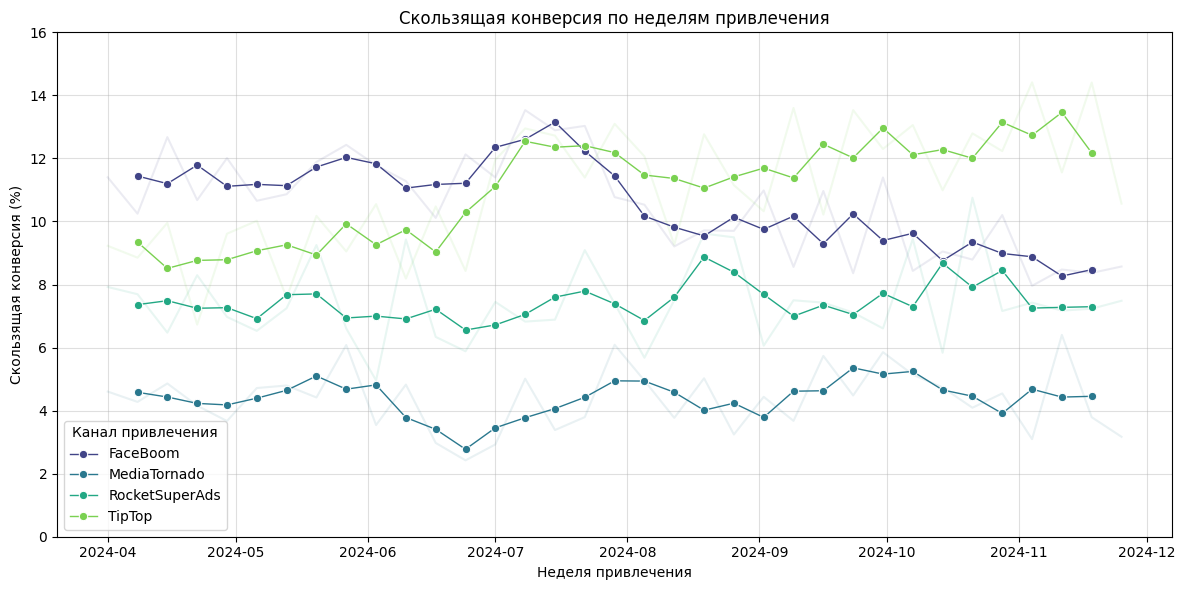

In [34]:
# Создаем когорты по неделе привлечения
orders_full['first_week'] = orders_full['first_dt'].dt.to_timestamp().dt.to_period('W')

# Считаем количество уникальных пользователей, покупающих в указанный период,
# для каждой когорты и каждого канала
order_users = orders_full.groupby(['first_week', 'first_channel'])['user_id'].nunique().reset_index()
order_users.rename(columns={'user_id': 'order_users', 'first_channel': 'channel'}, inplace=True)

active_users = visits_full.groupby(['first_week', 'channel'])['user_id'].nunique().reset_index()
active_users.rename(columns={'user_id': 'active_users'}, inplace=True)

# Объединяем данные о покупающих пользователях в период с размерами когорт
rolling_conversion = order_users.merge(active_users, on=['first_week', 'channel'])

rolling_conversion['first_week'] = rolling_conversion['first_week'].dt.to_timestamp()

# Рассчитываем скользящую конверсию (14-28 дней)
rolling_conversion['rolling_conversion'] = (
    (rolling_conversion['order_users'] /
    rolling_conversion['active_users']) * 100)

# Сглаживание данных
rolling_conversion_smooth = (
    rolling_conversion
    .groupby('channel')
    .apply(lambda x: x.assign(
        rolling_conversion_3 = x['rolling_conversion'].rolling(window=3, center=True)
        .mean()))
    .reset_index(drop=True))
    
# Визуализация данных
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=rolling_conversion,
    x='first_week',
    y='rolling_conversion',
    hue='channel',
    palette='viridis',
    alpha=0.1,
    legend=False)

sns.lineplot(
    data=rolling_conversion_smooth,
    x='first_week',
    y='rolling_conversion_3',
    hue='channel',
    marker='o',
    palette='viridis',
    linewidth=1)

plt.title('Скользящая конверсия по неделям привлечения')
plt.xlabel('Неделя привлечения')
plt.ylabel('Скользящая конверсия (%)')
plt.legend(title='Канал привлечения')
plt.ylim(0, 16)
plt.grid(alpha=.4)
plt.tight_layout()
plt.show()

Интерпретация
- TipTop приносит не только трафик, но и высококачественных пользователей
- FaceBoom требует переоценки подхода к маркетингу, так как со временем аудитория уходит
- RocketSuperAds и MediaTornado конвертируются слабо — средне и ниже среднего соответственно


### Недельная динамика затрат на маркетинг по каждому источнику привлечения

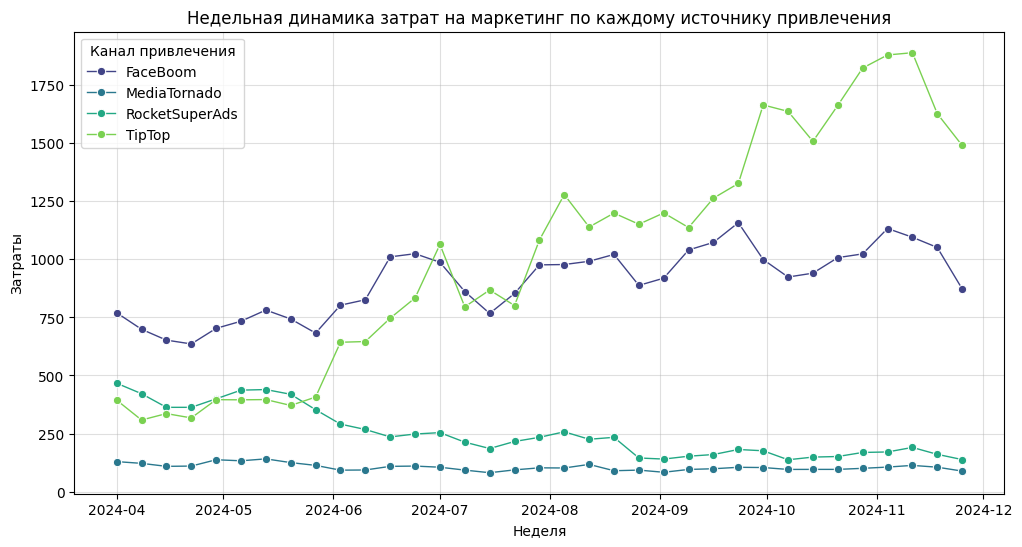

In [35]:
# Создаем копию исходного датафрейма для работы с недельными данными
costs_per_week = costs.copy()

# Преобразуем дату в недельные периоды для группировки
costs_per_week['week'] = costs_per_week['dt'].dt.to_timestamp().dt.to_period('W')

# Группируем данные по неделям и каналам, суммируя затраты
costs_per_week = costs_per_week.groupby(['week', 'channel'])['costs'].sum().reset_index()

# Преобразуем недельные периоды обратно в timestamp для корректного отображения на графике
costs_per_week['week'] = costs_per_week['week'].dt.to_timestamp()

# Создаем и настраиваем график недельной динамики затрат
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=costs_per_week,
    x='week',
    y='costs',
    hue='channel',
    marker='o',
    palette='viridis',
    linewidth=1)

plt.title('Недельная динамика затрат на маркетинг по каждому источнику привлечения')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.show()

Интерпретация
- Начиная с июня бюджет сильно перераспределён в пользу TipTop – с ~600 дол./нед до пиковых ~1 800 дол./нед.
- FaceBoom получил умеренный рост (до ~1 000 дол./нед), тогда как MediaTornado и RocketSuperAds были урезаны вдвое.
- Вывод: ставка сделана на рост трафика через TipTop, но при этом снизили инвестиции в более «тёплые» источники.

### Недельная динамика CAC, LTV и ROI

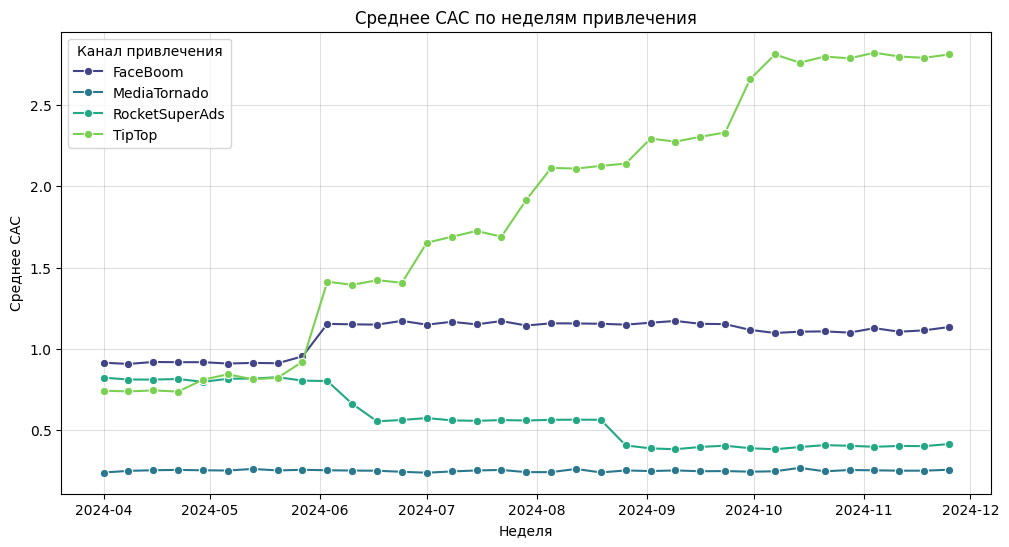

In [36]:
profiles['week'] = profiles['first_dt'].dt.to_timestamp().dt.to_period('W')

# Группируем данные по месяцу первого действия пользователя и считаем средний CAC по каждому месяцу
mean_cac_week_channel = (
    profiles
    .groupby(['week', 'first_channel'])['CAC']
    .mean()
    .reset_index())

# Переименование столбца для удобства
mean_cac_week_channel.rename(
    columns={'first_channel': 'channel'},
    inplace=True)

# Приводим дату к типу времени для визуализации
mean_cac_week_channel['week'] = mean_cac_week_channel['week'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mean_cac_week_channel,
    x='week',
    y='CAC',
    marker='o',
    palette='viridis',
    hue='channel')

plt.title('Среднее CAC по неделям привлечения')
plt.xlabel('Неделя')
plt.ylabel('Среднее CAC')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.show()

На представленном графике хорошо заметна следующая картина:

- TipTop
    - В апреле–мае CAC составлял примерно 0,7–0,8 долл., к июню резко вырос до 1,4 долл., а к осени и концу года стабильно удерживается на уровне 2,7–2,9 долл.
    - Ежемесячный тренд: стоимость привлечения увеличивается почти каждый месяц.

- FaceBoom
    - Диапазон 0,9–1,2 долл. за весь период, без выраженной восходящей или нисходящей тенденции.

- RocketSuperAds
    - В начале мая CAC около 0,8 долл., затем падение до 0,5–0,6 долл. и последующая стабилизация в этом коридоре.

- MediaTornado
    - Самая низкая и стабильная стоимость – около 0,2–0,3 долл., без значимых колебаний.    

Выводы
- Усиление конкуренции или повышение стоимости закупки трафика TipTop приводит к постоянному росту CAC в этом канале.
- Остальные источники не подвержены той же динамике: либо стоимость удерживается на прежнем уровне (FaceBoom), либо даже снижается (RocketSuperAds), что делает их относительно более выгодными.


/tmp/ipykernel_75815/1820350271.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(


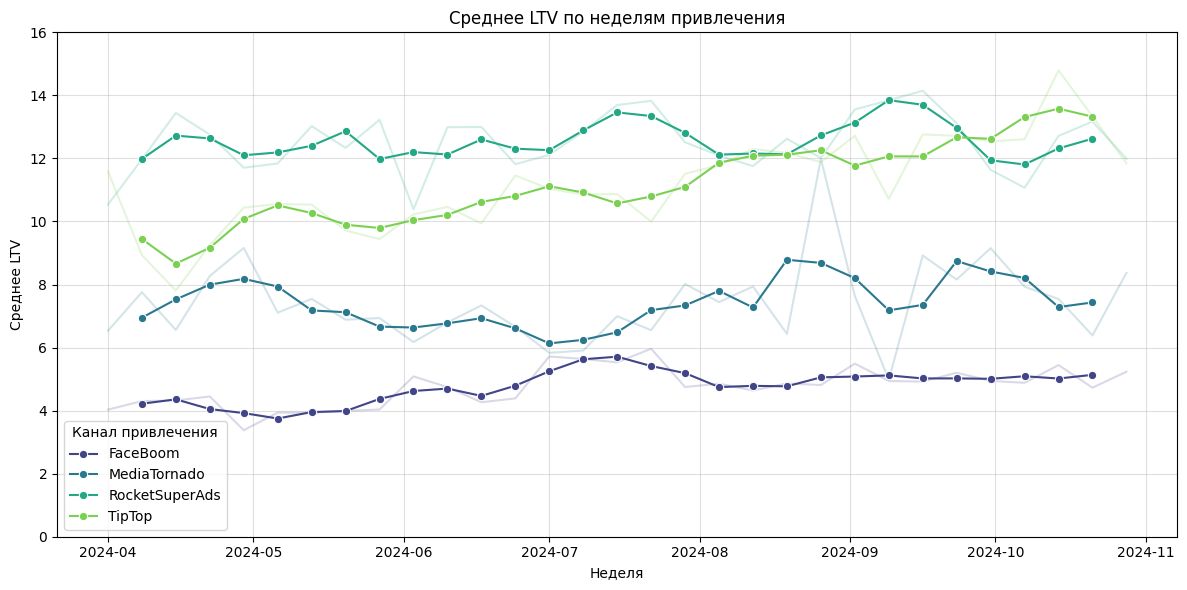

In [37]:
# Создаем копию исходного датафрейма для работы с недельными данными
orders_week_channel = orders_full.copy()

# Фильтруем данные по периоду LTV в 28 дней
orders_week_channel = orders_week_channel[
    (orders_week_channel['lifetime'] <= 28) &
    (orders_week_channel['first_dt'] < '2024-11-01')]

# Сортировка данных по ID пользователя и дню заказа
# Необходима для корректного расчета накопительных значений (LTV)
orders_week_channel = orders_week_channel.sort_values(by=['user_id', 'lifetime'])

# Расчет LTV
orders_week_channel['LTV'] = orders_week_channel.groupby('user_id')['revenue'].transform('cumsum')

# Группировка данных по неделе привлечения и каналу и расчет среднего LTV
mean_ltv_week_channel = (
    orders_week_channel
    .groupby(['first_week', 'first_channel'])['LTV']
    .mean()
    .reset_index())

# Переименование столбца для удобства
mean_ltv_week_channel.rename(
    columns={
        'first_channel': 'channel',
        'first_week': 'week'},
    inplace=True)

# Преобразование столбца с неделей в формат времени для визуализации
mean_ltv_week_channel['week'] = mean_ltv_week_channel['week'].dt.to_timestamp()

# Сглаживание данных
mean_ltv_week_channel_smooth = (
    mean_ltv_week_channel
    .groupby('channel')
    .apply(lambda x: x.assign(
        LTV_3 = x['LTV'].rolling(window=3, center=True).mean()))
    .reset_index(drop=True))

# Визуализация данных
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mean_ltv_week_channel,
    x='week',
    y='LTV',
    palette='viridis',
    hue='channel',
    legend=False,
    alpha=0.2)

sns.lineplot(
    data=mean_ltv_week_channel_smooth,
    x='week',
    y='LTV_3',
    marker='o',
    palette='viridis',
    hue='channel')

plt.title('Среднее LTV по неделям привлечения')
plt.xlabel('Неделя')
plt.ylabel('Среднее LTV')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.ylim(0, 16)
plt.tight_layout()
plt.show()

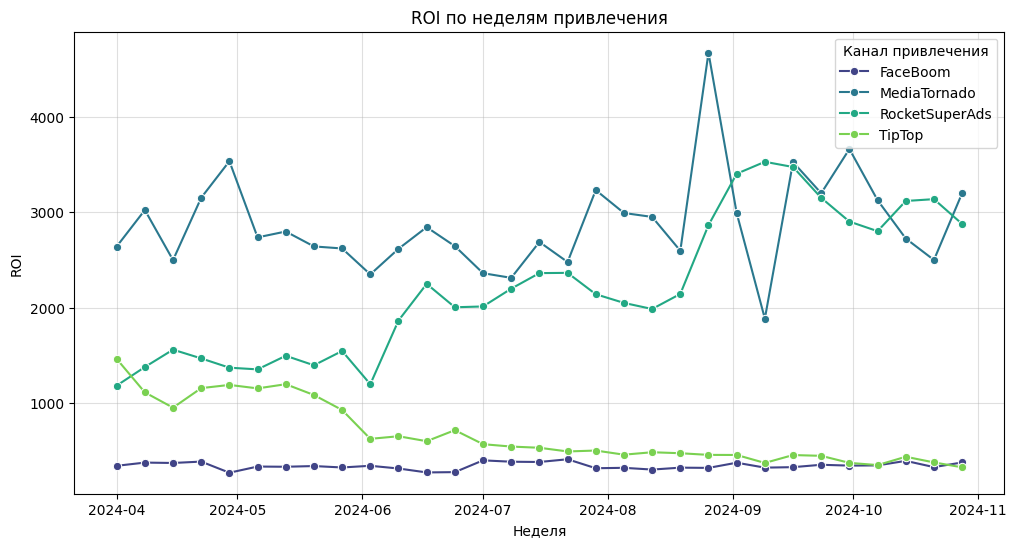

In [38]:
mean_roi_week_channel = pd.merge(
    mean_ltv_week_channel,
    mean_cac_week_channel,
    on=['week', 'channel'])

mean_roi_week_channel['ROI'] = (mean_roi_week_channel['LTV'] - mean_roi_week_channel['CAC']) / mean_roi_week_channel['CAC'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mean_roi_week_channel,
    x='week',
    y='ROI',
    marker='o',
    palette='viridis',
    hue='channel')

plt.title('ROI по неделям привлечения')
plt.xlabel('Неделя')
plt.ylabel('ROI')
plt.legend(title='Канал привлечения')
plt.grid(alpha=.4)
plt.show()

Интерпретация

- TipTop
    - CAC постоянно растёт – с ~0,8 долл. в апреле до ~2,8 долл. к осени.
    - LTV тоже растёт, но медленнее, поэтому ROI падает до самого низкого уровня.

- MediaTornado
    - CAC стабильно низкий (~0,25–0,35 долл.).
    - LTV держится на уровне 6–8 долл..
    - ROI самый высокий среди всех каналов.

- RocketSuperAds
    - CAC снизился до ~0,5–0,6 долл.
    - LTV вырос до ~12–14 долл.
    - ROI постепенно растёт, показывает сильный потенциал.

- FaceBoom
    - CAC и LTV стабильны, но на низких значениях.
    - ROI минимальный и без заметного тренда.

- Краткий вывод
    - TipTop стал слишком дорогим с точки зрения привлечения, даже при росте LTV.
    - MediaTornado и RocketSuperAds дают лучший ROI и нуждаются в наращивании бюджета.
    - FaceBoom можно держать на «поддерживающем» уровне, но не наращивать расходы.



### Общая характеристика рекламных каналов

#### **FaceBoom**

- Объем трафика: 28 401 пользователь
- CAC: ~ 1 \$ (выше среднего)
- LTV: ~ 5 \$ (критически низкий)
- ROI: ~ 500 % (минимальный среди каналов)
- Stickiness (DAU/MAU): ~ 4 % (самый низкий)
- Retention (14–28 дн.): ~ 2–3 % (критически низкий)
- **Характеристика**: Большой охват, но низкое качество. Пользователи характеризуются минимальной вовлеченностью и коротким жизненным циклом

#### **TipTop**

- Объем трафика: 18 118 пользователей
- CAC: от ~ 0,7 \$ в апреле до ~ 2,8 \$ в декабре (+300 %)
- LTV: ~ 15 \$–20 \$ (выше медианы)
- ROI: апрель ~ 3000 %, декабрь ~ 200 % (−90 %)
- Stickiness: 6 % → 7,5 % (+25 %)
- Retention: 10 % → 25 % (+150 %)
- Затраты: 400 \$/нед в апреле → 1500 \$/нед в декабре (самый дорогой канал)
- DAU/MAU: рекордные значения среди всех каналов
- **Характеристика**: Быстрорастущий канал с высокой вовлечённостью, но стремительно растущим CAC и падающим ROI.


#### **RocketSuperAds**

- Объем трафика: 14 257 пользователей
- CAC: ~ 0,7 \$ → ~ 0,4 \$ (−40 %)
- LTV: ~ 15 \$–25 \$ (выше среднего)
- ROI: ~ 3000 %–5000 % (устойчиво высокий)
- Stickiness: ~ 6 % (выше среднего)
- Retention: ~ 10 % (средний)
- **Характеристика**: Самый сбалансированный канал с точки зрения вложенных средст, а также качества и количества полученной аудитории


#### **MediaTornado**

- Объем трафика: 14 080 пользователей
- CAC: ~ 0,2–0,3 \$ (минимальный)
- LTV: ~ 7 \$–10 \$ (медианное значение)
- ROI: ~ 4000 % (выше среднего)
- Stickiness: ~ 5,5 % (средний)
- Retention: ~ 10 % (средний)
- **Характеристика**: Наиболее экономичный канал по CAC при средних показателях вовлечённости и LTV.


### Возможные причины низкой окупаемости

- Неоптимальное перераспределение бюджета в сторону каналов с растущим CAC (TipTop)
- Низкая конверсия и удержание в каналах с большим охватом (FaceBoom)
- Усиление конкуренции в аукционах и рост ставок на ключевых площадках
- Привлечение аудитории с низкой готовностью платить
- Ограниченная монетизация спортивного контента и каннибализация спортом основного предложения


## Анализ периода окупаемости маркетинговых вложений

Для источников, которые к 28-му дню не выходят на уровень окупаемости, рассчитайте и визуализируйте в виде тепловой карты значения ROI за больший период, например за 8–10 недель.

Разделите данные на недельные когорты по дате привлечения, в качестве интервала наблюдений используйте недели.

Сделайте вывод о том, за какой период окупаются вложения в эти источники.

In [39]:
# Копия orders_full
heatmap_orders = orders_full.copy()

# Переводим event_dt и first_dt в week
heatmap_orders['order_week'] = heatmap_orders['event_dt'].dt.to_timestamp().dt.to_period('W').dt.to_timestamp()
heatmap_orders['first_week'] = heatmap_orders['first_dt'].dt.to_timestamp().dt.to_period('W').dt.to_timestamp()

# Вычисляем N_week
heatmap_orders['N_week'] = (heatmap_orders['order_week'] - heatmap_orders['first_week']).dt.days / 7

# Сортируем для правильного cumsum
heatmap_orders = heatmap_orders.sort_values(['user_id', 'event_dt'])

# Вычисляем LTV
heatmap_orders = (
    heatmap_orders
    .groupby(['first_channel', 'first_week', 'N_week'])
    ['revenue']
    .sum()
    .reset_index())

# Сортируем для правильного cumsum
heatmap_orders = heatmap_orders.sort_values(by=['first_channel', 'N_week'])

# Вычисляем cumsum
heatmap_orders['cumsum'] = heatmap_orders.groupby(['first_channel', 'first_week'])['revenue'].cumsum()

# Вычисляем cohort_size
cohort_size = profiles.copy()
cohort_size['first_week'] = cohort_size['first_dt'].dt.to_timestamp().dt.to_period('W').dt.to_timestamp()

# Вычисляем cohort_size и CAC
cohort_size = cohort_size.groupby(['first_channel','first_week']).agg({'user_id':'nunique','CAC':'mean'}).reset_index()
cohort_size.columns = ['first_channel', 'first_week', 'total_users', 'CAC']

# Объединяем
heatmap_orders = heatmap_orders.merge(cohort_size, on=['first_channel','first_week'])

# Вычисляем LTV
heatmap_orders['LTV'] = heatmap_orders['cumsum'] / heatmap_orders['total_users']

# Вычисляем ROI
heatmap_orders['ROI'] = (heatmap_orders['LTV'] - heatmap_orders['CAC']) / heatmap_orders['CAC']


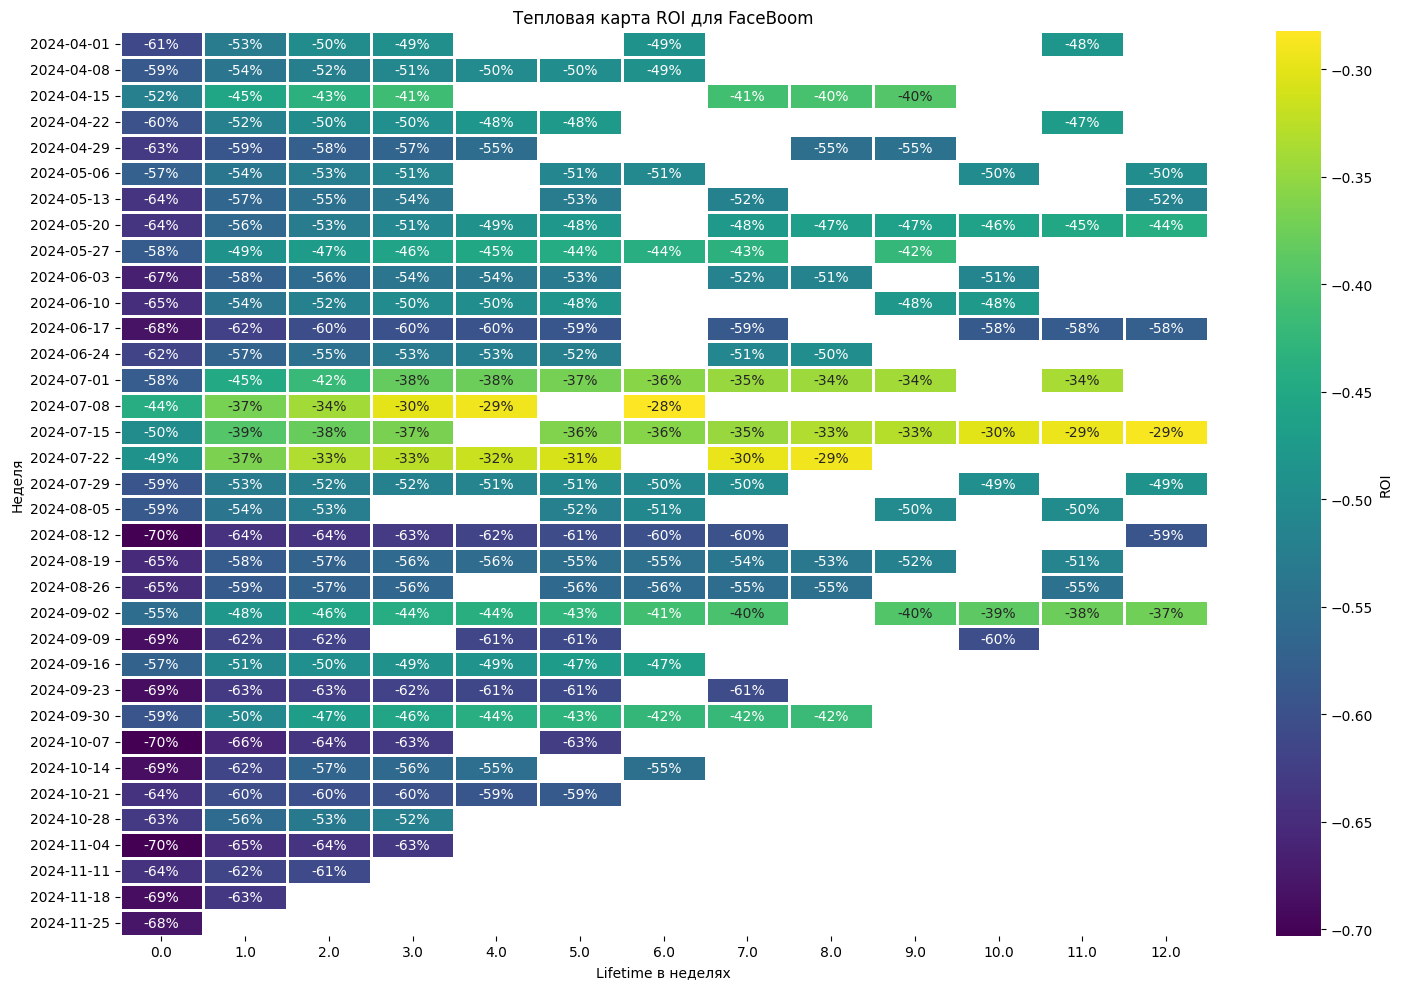

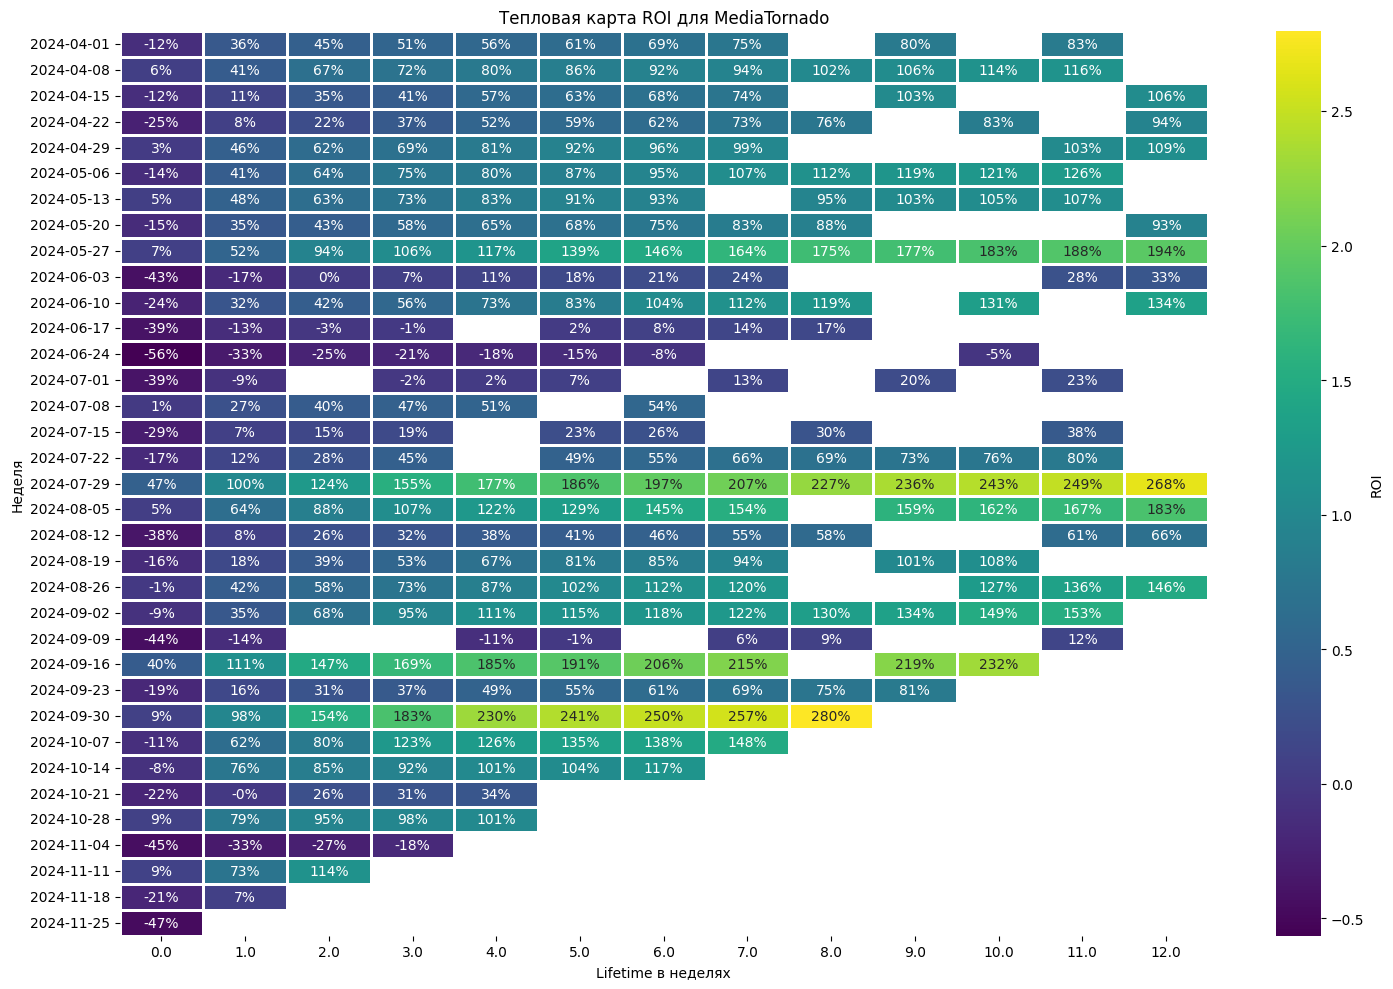

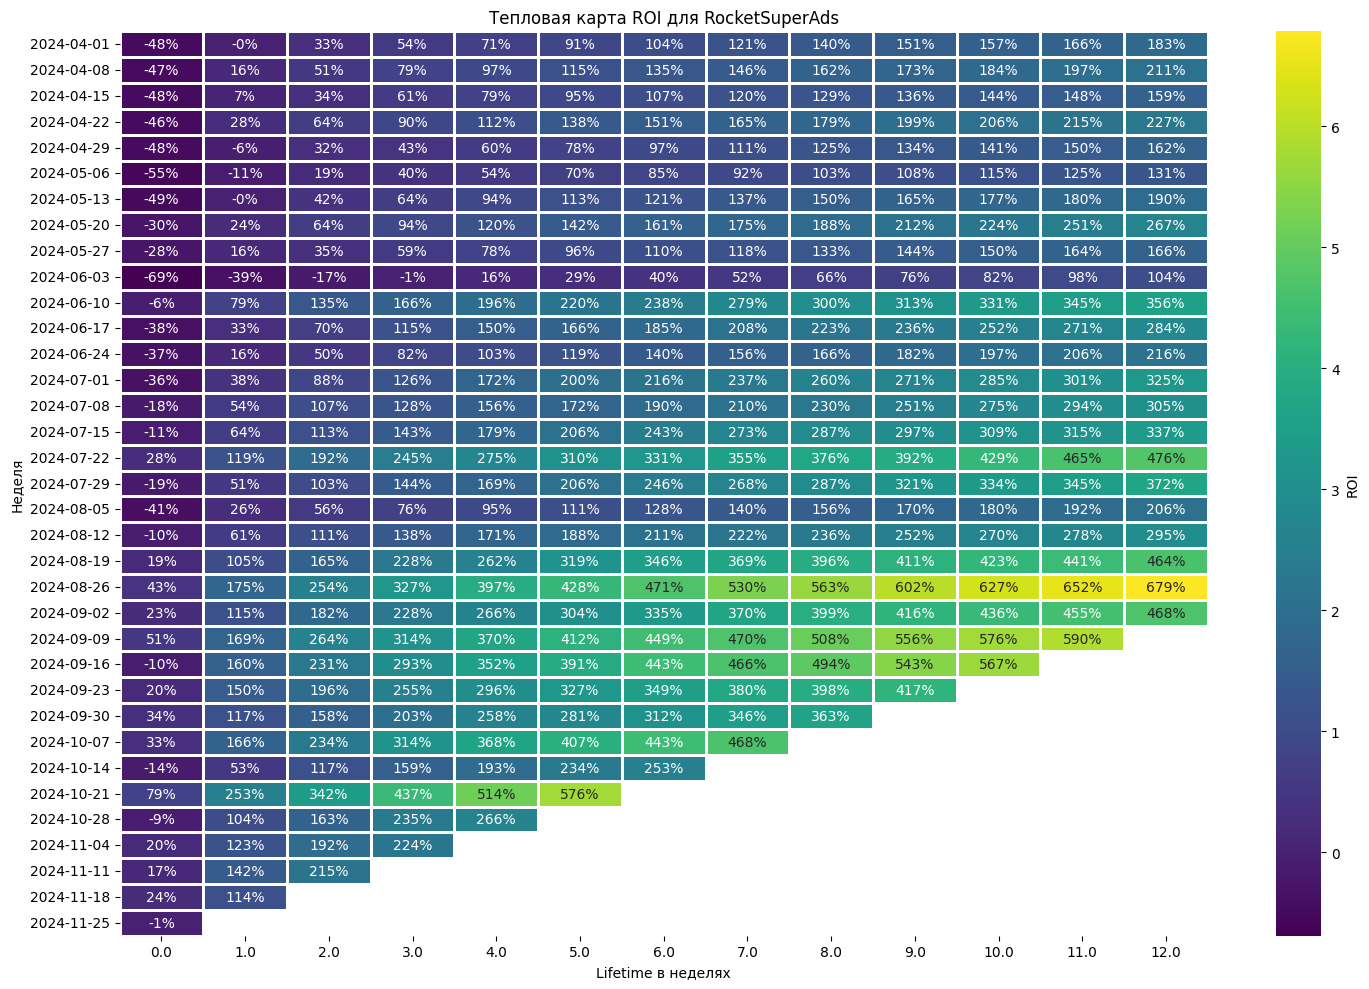

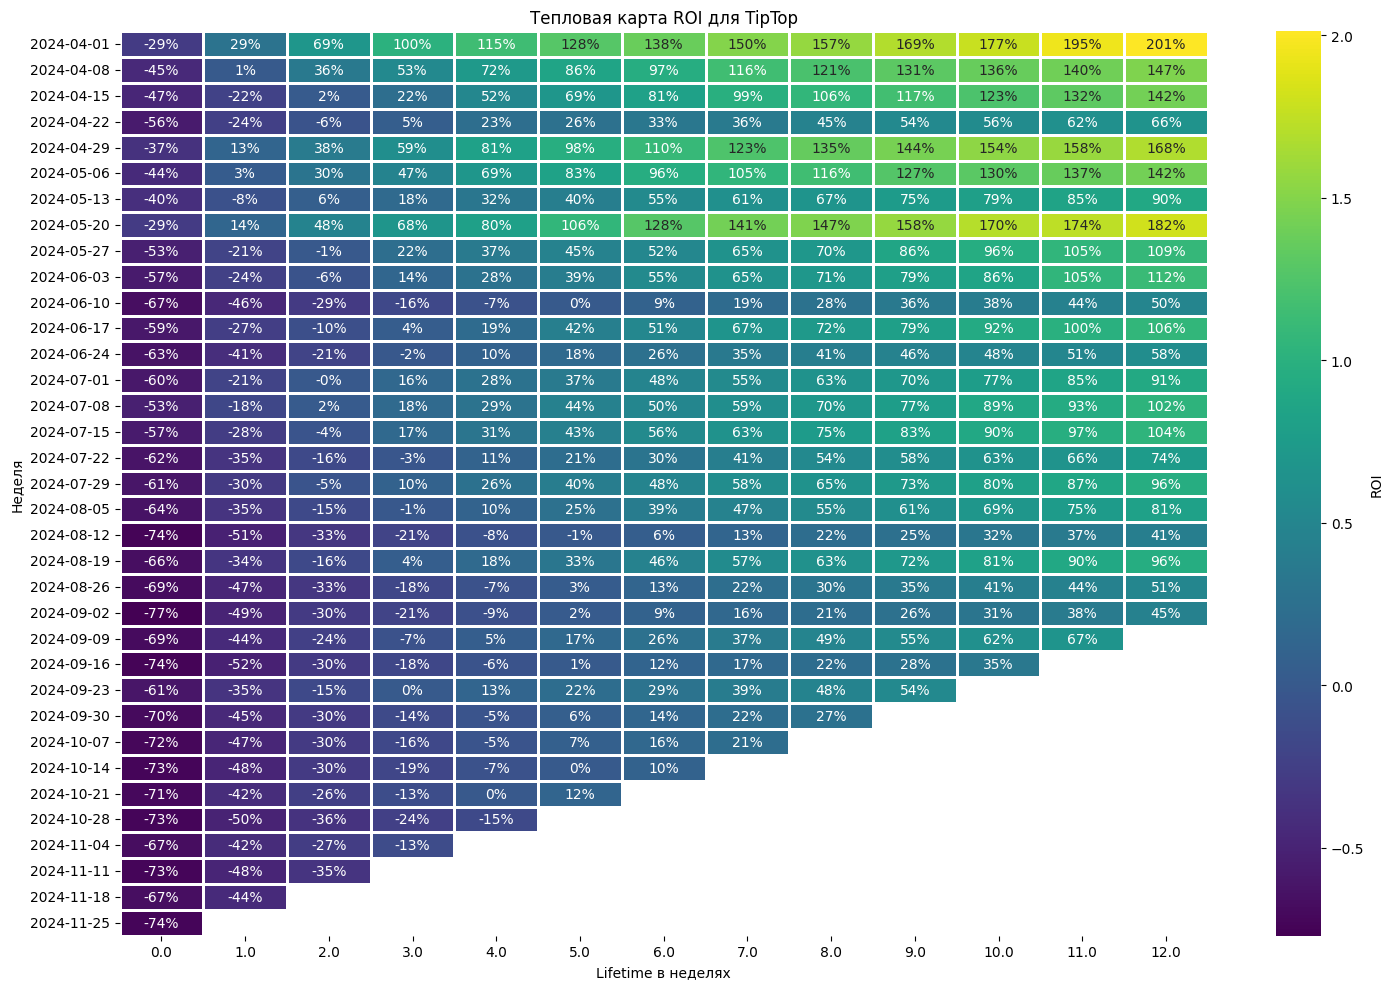

In [40]:
# Переименовываем столбцы
heatmap_orders = heatmap_orders.rename(columns={'first_week': 'week', 'first_channel': 'channel'})

# Ограничиваем lifetime до 12 недель
heatmap_orders = heatmap_orders[heatmap_orders['N_week'] <= 12]

# Построение тепловых карт
for channel in heatmap_orders['channel'].unique():
    plot_df = heatmap_orders[heatmap_orders['channel'] == channel]
    heatmap_pivot = (
        plot_df.pivot(
            index='week',
            columns='N_week',
            values='ROI'))
    heatmap_pivot.index = heatmap_pivot.index.strftime('%Y-%m-%d')
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_pivot,
        cmap='viridis',
        annot=True,
        fmt='.0%',
        linewidths=1,
        cbar_kws={'label': 'ROI'})
    plt.title(f'Тепловая карта ROI для {channel}')
    plt.xlabel('Lifetime в неделях')
    plt.ylabel('Неделя')
    plt.tight_layout()
    plt.show()


## Выводы и рекомендации


Итоговые выводы
1. Общая характеристика аудитории и маркетинговых затрат

    Аудитория Procrastinate Pro+ существенно увеличилась после запуска спортивного контента, что дало прирост новых регистраций и активных пользователей. Наиболее заметный рост продемонстрировали источники с массовым, но менее платежеспособным трафиком.

    Распределение маркетинговых вложений сместилось в пользу канала TipTop, доля расходов на него выросла более чем в 3 раза к концу года, при этом бюджеты на FaceBoom, MediaTornado и RocketSuperAds были урезаны или остались такими же

2. Анализ каналов привлечения
- FaceBoom
    - Несмотря на самый высокий охват, канал характеризуется низким качеством привлечённой аудитории: низкие показатели вовлечённости, удержания и средний чек.
    - Демонстрирует катастрофически низкие показатели ROI (-30% до -70% на протяжении всего периода наблюдения)
    - Канал не окупается даже к 10-12 неделям, оставаясь глубоко убыточным
    - Требует немедленного пересмотра стратегии или сокращения бюджета

- TipTop
    - Основной драйвер роста пользовательской базы — рекордные показатели по DAU/MAU, высокое удержание и вовлечённость.
    - Однако CAC вырос в 4 раза, а ROI рухнул почти до нуля — эффективность вложений резко снизилась, причина — высокая конкуренция и удорожание трафика
    - Хорошие результаты летом (ROI до 200%) с резким ухудшением к осени
    - К концу периода наблюдения многие когорты показывают отрицательный или близкий к нулю ROI
    - Эффективность канала значительно деградировала, несмотря на увеличение бюджета

- RocketSuperAds
    - Сбалансированный канал: сочетание снижающегося CAC и высокого LTV.
    - Лучший канал по итоговому ROI (600-700%+ для успешных когорт)
    - Стабильно высокие показатели окупаемости на протяжении всего периода
    - Демонстрирует устойчивую эффективность без существенных просадок

-   MediaTornado
    - Наиболее экономичный по стоимости привлечения.
    - При средних LTV и вовлечённости демонстрирует стабильную и быструю окупаемость
    - Показывает отличную динамику окупаемости: быстрый переход в положительную зону ROI к 4-6 неделям
    - Стабильно высокий ROI (100-250%+) к концу периода наблюдения


3. Рекомендации отделу маркетинга

Немедленные действия:

- Остановить инвестиции в FaceBoom до кардинального пересмотра стратегии - канал показывает стабильную убыточность
- Максимально увеличить бюджет RocketSuperAds - канал демонстрирует лучшие показатели ROI и стабильность
- Активно масштабировать MediaTornado - быстрая окупаемость и высокий итоговый ROI

Оптимизация TipTop:

- Провести глубокий анализ причин деградации эффективности (сезонность, усиление конкуренции, усталость креативов)
- Временно сократить бюджет на 50-70% до восстановления показателей окупаемости
- Протестировать новые креативы и аудитории, ориентированные на спортивный контент

Долгосрочная стратегия:

- Сфокусироваться на каналах с устойчивой положительной динамикой ROI (RocketSuperAds, MediaTornado)
- Внедрить еженедельный мониторинг когортного ROI для оперативного реагирования на изменения эффективности
- Разработать сезонные стратегии для каналов, показывающих временную зависимость эффективности

Продуктовые инициативы:

- Усилить монетизацию спортивного контента через премиум-подписки
- Улучшить онбординг для повышения раннего удержания и ускорения окупаемости
- Запустить реферальную программу для органического роста от качественных пользователей
